In [7]:
import mne
import mne_connectivity
from mne_connectivity import spectral_connectivity_time
from connection_complexity.data.raw_data.EDF.edf_helpers import read_edf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
eeg = read_edf('/media/dan/Data/data/iEEG/raw_ieeg/patientDumps/FC/OvertNaming.EDF', preload=True, drop_EEG_Prefix=True)

# set bads
bads = []
# bads = ["TO'7"] # for patient PC
eeg.info['bads'] = bads
# remove 60hz + harmonics
eeg = eeg.notch_filter(np.arange(60, 241, 60),verbose=False)
eeg,_ = mne.set_eeg_reference(eeg, 'average', projection=False) # false applies it to the data; true makes a new channel

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


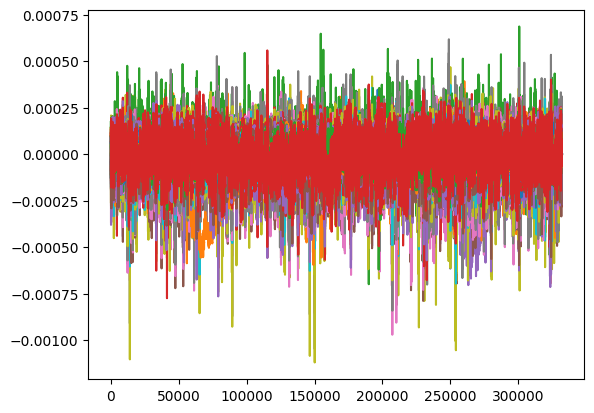

In [54]:
data = eeg.get_data(picks='all')

# remove indexs corresponding to bad channels
bad_inds = [eeg.ch_names.index(bad) for bad in bads]
data = np.delete(data, bad_inds, axis=0)
plt.plot(data.T);

In [55]:
data.shape

(124, 332032)

In [56]:
# find indices of waveform (row) where any value of waveform (column) is > thresh
thresh = 0.005
idx = np.where(np.any(data > 0.0050, axis=1))[0]
idx

array([], dtype=int64)

In [58]:
Fs = eeg.info['sfreq']

# amount of time to use in seconds
time_sec = 10
cuteeg = data[:, 0:int(Fs*time_sec)]

# Define window length in milliseconds
N = 1000

# Calculate the number of samples per window
samples_per_window = int((N / 1000) * Fs)

# Calculate the number of epochs
num_epochs = cuteeg.shape[1] // samples_per_window

# Reshape the array to create the new dimension for epochs
raweeg_epochs = np.reshape(cuteeg[:, :num_epochs * samples_per_window], (num_epochs, cuteeg.shape[0], samples_per_window))


In [59]:
dur = float(samples_per_window) / Fs
cycle_freq = 7 / dur
cycle_freq

7.0

In [60]:
# %%
con = spectral_connectivity_time(
    raweeg_epochs,
    method="coh",
    mode="multitaper",
    sfreq=Fs,
    freqs = np.arange(10, 150, 1),
    faverage=True,
    n_jobs=40,
    verbose=10,
)

Fmin was not specified. Using fmin=min(freqs)
Fmax was not specified. Using fmax=max(freqs).
Connectivity computation...
   Processing epoch 1 / 10 ...
Got 40 parallel jobs after requesting 40


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  32 tasks      | elapsed:    4.9s
[Parallel(n_jobs=40)]: Done 110 out of 124 | elapsed:    6.8s remaining:    0.9s
[Parallel(n_jobs=40)]: Done 124 out of 124 | elapsed:    7.1s finished


Got 40 parallel jobs after requesting 40
Using ProgressBar with tqdm.auto


  0%|          |  : 0/7626 [00:00<?,       ?it/s]

   Processing epoch 2 / 10 ...
Got 40 parallel jobs after requesting 40


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  32 tasks      | elapsed:    1.1s
[Parallel(n_jobs=40)]: Done  60 out of 124 | elapsed:    1.7s remaining:    1.8s
[Parallel(n_jobs=40)]: Done 110 out of 124 | elapsed:    2.5s remaining:    0.3s
[Parallel(n_jobs=40)]: Done 124 out of 124 | elapsed:    2.7s finished


Got 40 parallel jobs after requesting 40
Using ProgressBar with tqdm.auto


  0%|          |  : 0/7626 [00:00<?,       ?it/s]

   Processing epoch 3 / 10 ...
Got 40 parallel jobs after requesting 40


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  32 tasks      | elapsed:    1.1s
[Parallel(n_jobs=40)]: Done  60 out of 124 | elapsed:    1.7s remaining:    1.8s
[Parallel(n_jobs=40)]: Done 110 out of 124 | elapsed:    2.5s remaining:    0.3s
[Parallel(n_jobs=40)]: Done 124 out of 124 | elapsed:    2.8s finished


Got 40 parallel jobs after requesting 40
Using ProgressBar with tqdm.auto


  0%|          |  : 0/7626 [00:00<?,       ?it/s]

   Processing epoch 4 / 10 ...
Got 40 parallel jobs after requesting 40


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  32 tasks      | elapsed:    1.1s
[Parallel(n_jobs=40)]: Done  60 out of 124 | elapsed:    1.7s remaining:    1.8s
[Parallel(n_jobs=40)]: Done 110 out of 124 | elapsed:    2.6s remaining:    0.3s
[Parallel(n_jobs=40)]: Done 124 out of 124 | elapsed:    2.8s finished


Got 40 parallel jobs after requesting 40
Using ProgressBar with tqdm.auto


  0%|          |  : 0/7626 [00:00<?,       ?it/s]